# K-Means

In [ ]:
import numpy as np

class kMeans:
    def __init__(self, k=3, max_iters=100):
        self.k = k
        self.max_iters = max_iters
    
    def fit(self, X):
        y = np.random.randint(0, self.k, size=X.shape[0])
        self.centroids = np.array([X[y == i].mean(axis=0) for i in range(self.k)])
        prev_y = None
        iters = 0
        while (y != prev_y).any() and iters < self.max_iters:
            prev_centroids = self.centroids.copy()
            
            prev_y = y.copy()
            for i in range(X.shape[0]):
                row = X[i, :]
                closest_centroid, _ = self.__get_closest_centroid__(row)
                y[i] = closest_centroid
                
            self.centroids = np.array([X[y == i].mean(axis=0) if X[y == i].size else prev_centroids[i]
                                       for i in range(self.k)])
            iters += 1
            
        return y, self.centroids
        
    def predict(self, x):
        return self.__get_closest_centroid__(x)
    
    def __get_closest_centroid__(self, x):
        ans = 0
        distance = self.__get_distance__(x, self.centroids[0])
        for i in range(1, self.centroids.shape[0]):
            curr_distance = self.__get_distance__(x, self.centroids[i])
            if curr_distance < distance:
                ans = i
                distance = curr_distance
        return ans, distance
    
    def __get_distance__(self, x1, x2):
        return np.linalg.norm(x1 - x2)

## K-Means Clustering

In [1]:
from Scratch.kMeansClustering import kMeans

In [2]:
from Scratch.helpers.GetDatasets import clustering_split
X_train, X_test, y_train, y_test = clustering_split()

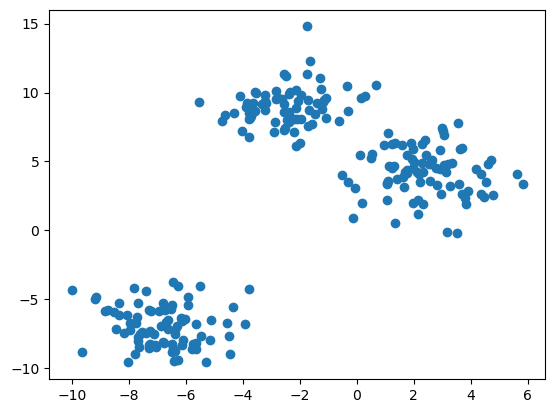

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X_train[:,0], X_train[:,1])

In [4]:
k = 5
cluster_model = kMeans(k=k)
preds, centroids = cluster_model.fit(X_train)
import numpy as np
np.unique(preds, return_counts=True)

(array([0, 2, 3, 4]), array([82, 77, 33, 48], dtype=int64))

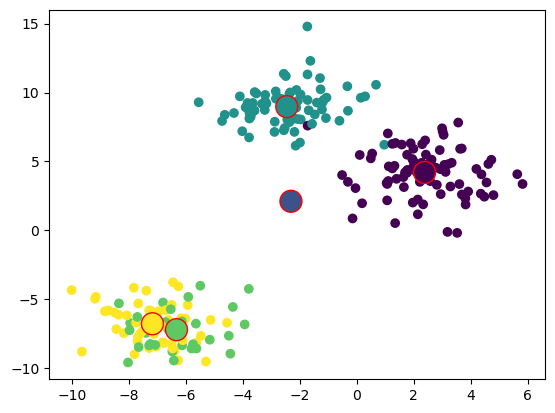

In [5]:
plt.scatter(X_train[:,0], X_train[:,1], c=preds)
plt.scatter(centroids[:,0], centroids[:,1], s=250, c=range(k), edgecolors='red')